**Progress Report #3 - Evaluation**

Team Name: Regal Royals

1. Shinhyuk Park
2. Devin Dupree
3. Samnang Pech

# **Dataset**

Name: Electric Vehicle Population Data

Size: 205440 + 17 features

Features:
- **VIN (1-10):** The first 10 characters of the Vehicle Identification Number, a unique identifier for each vehicle.
- **County:** The county where the vehicle is registered.
- **City:** The city where the vehicle is registered.
- **State:** The state where the vehicle is registered.
- **Postal Code:** The postal code corresponding to the vehicle's registration address.
- **Model Year:** The year the vehicle was manufactured.
- **Make:** The manufacturer of the vehicle (e.g., Tesla, Nissan).
- **Model:** The specific model of the vehicle (e.g., Model 3, Leaf).
- **Electric Vehicle Type:** Whether the vehicle is a battery electric vehicle (BEV) or a plug-in hybrid electric vehicle (PHEV).
- **Clean Alternative Fuel Vehicle:** Whether the vehicle qualifies as a clean alternative fuel vehicle.
- **Electric Range:** The range the vehicle can travel on electric power alone (in miles).
- **Base MSRP:** The Manufacturer’s Suggested Retail Price (base price) of the vehicle.
- **Legislative District:** The legislative district associated with the vehicle's registration.
- **DOL Vehicle ID:** An internal identifier used by the Department of Licensing for the vehicle.
- **Vehicle Location:** The geographical coordinates (latitude and longitude) of the vehicle’s registration location.
- **Electric Utility:** The electric utility provider associated with the vehicle’s registration address.
- **2020 Census Tract:** The census tract where the vehicle is registered, based on the 2020 Census data.

*We have added an additional dataset containing columns with numerical values that are well-suited for a linear regression model with multiple features.*

Name: NYSERDA Electric Vehicle Drive Clean Rebate Program

Size: 168,775 + 11 features

Features:
- **Data** through Date: Indicates the data cutoff date for the entry.
Submitted Date: The date when the rebate application was submitted.
- **Make**: The manufacturer of the vehicle (e.g., Jeep).
- **Model**: The specific model of the vehicle (e.g., Wrangler).
- **County**: The county in which the rebate was claimed (e.g., Nassau).
- **ZIP**: The postal code associated with the rebate application.
- **EV Type**: The type of electric vehicle (e.g., Plug-in Hybrid Electric Vehicle (PHEV)).
- **Transaction Type**: Indicates whether the vehicle was purchased or leased.
- **Annual GHG Emissions Reductions (MT CO2e)**: The estimated annual greenhouse - gas emissions reduced by the EV (measured in metric tons of CO2 equivalent).
- **Annual Petroleum Reductions (gallons)**: The estimated annual petroleum saved by using the EV (measured in gallons).
- **Rebate Amount (USD)**: The monetary rebate provided for the EV (in USD).

This code imports various Python libraries for data analysis, machine learning, and plotting. It then loads an electric vehicle dataset from an online source (Excel file) into a DataFrame called eCar, preparing it for further analysis.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import r_regression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

url = 'https://raw.githubusercontent.com/shinPark43/CS-4330---Project-Regal-Royals-/main/dataset/Electric_Vehicle_Population_Data.xlsx'
eCar = pd.read_excel(url)

url2 = 'https://raw.githubusercontent.com/shinPark43/CS-4330---Project-Regal-Royals-/main/dataset/NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017.csv'
eCar2 = pd.read_csv(url2)

#**Linear Regression**

This section creates a linear regression model using two selected attributes from the eCar dataset. It utilizes Matplotlib to plot the observed values against the predicted values and evaluates the model's performance using loss functions, including mean squared error, root mean squared error, and mean absolute error.

1. This code analyzes how the electric range of vehicles has improved in more recent models and visualizes this trend. It begins by cleaning the data, removing any rows with missing values in the "Model Year" or "Electric Range" columns. Then, it filters the data to include only vehicles made after 2014 with an electric range of at least 200 miles, focusing on modern electric cars with practical ranges. Using this filtered data, it trains a linear regression model to predict the electric range based on the model year. Finally, it creates a scatter plot of actual data points (in purple) and overlays a green line showing the model’s predicted trend.

Text(0, 0.5, 'Electric Range (miles)')

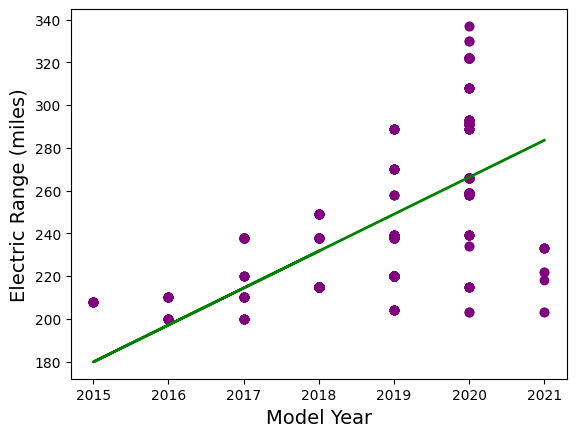

In [42]:
eCar_linear = eCar.dropna(subset=['Model Year', 'Electric Range'])
eCar_linear = eCar_linear[~((eCar_linear['Model Year'] <= 2014) | (eCar_linear['Electric Range'] < 200))]
eCar_sample3 = eCar_linear.sample(n=1000)

ModelYear = eCar_sample3[['Model Year']].values.reshape(-1, 1)
ElectricRange = eCar_sample3[['Electric Range']].values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(ModelYear, ElectricRange)
ElectricRangePredicted = model.predict(ModelYear)

# Graph the model
plt.scatter(ModelYear, ElectricRange, color='purple')
plt.plot(ModelYear, ElectricRangePredicted, color='green', linewidth=2)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)

**Interpretation**

* The data above shows a positive linear regression.
* The new parameters now highlight the practicality of having a modern EV. This data would do better to entice customers to purchase an EV. As seen with the electric range, this is much more productive for daily commutes.


2. Report loss functions: Loss functions are meant to quantify the difference between predicted and observed values. I will use the current and predicted y values for the above graph to determine the values.

In [43]:
# Display MSE
LinearMSE = metrics.mean_squared_error(ElectricRange, ElectricRangePredicted)
print(LinearMSE)

698.0315462425516


In [44]:
# Display RMSE
LinearRMSE = metrics.root_mean_squared_error(ElectricRange, ElectricRangePredicted)
print(LinearRMSE)

26.420286641945268


In [45]:
# Display MAE
LinearMAE = metrics.mean_absolute_error(ElectricRange, ElectricRangePredicted)
print(LinearMAE)

21.785767311379217


**Interpretation**

* On average, the model's predictions differ from the actual values by about 20–25 units. The higher RMSE compared to MAE indicates that some predictions have larger errors. Whether these errors are acceptable depends on the range of the target variable (ElectricRange).

3. Simple Train-Test Split: We will use the train-test split to evaluate the performance while adjusting some parameters. The testing portion will compare the metrics and showcase the performance of the model.

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ModelYear, ElectricRange, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

4. Cross Validation: For the cross validation we will validate each measure of the linear regression to measure the performance. Since this is a five fold cross validation, this is a non-exhaustive validation because it does not use every possible way to divide the sample.

In [47]:
# Cross-validate the model using MSE as scoring metrics
LinearMSECV = -cross_val_score(
    model, ModelYear, ElectricRange, scoring='neg_mean_squared_error', cv=5)
print(LinearMSECV)

# Cross-validate the model using RME as scoring metrics
LinearRMSECV = -cross_val_score(
    model, ModelYear, ElectricRange, scoring='neg_root_mean_squared_error', cv=5)
print(LinearRMSECV)

# Cross-validate the model using MAE as scoring metrics
LinearMAECV = -cross_val_score(
    model, ModelYear, ElectricRange, scoring='neg_mean_absolute_error', cv=5)
print(LinearMAECV)

[657.78023591 722.87445098 697.76787026 658.23405905 766.09508148]
[25.64722667 26.88632461 26.41529614 25.65607256 27.67842267]
[21.55233109 22.34994001 21.27528586 21.33591984 22.67705577]


**Interpretation**

* The CV values for RMSE & MAE remain consistent in a range of no more than 1 for each CV. This lets us know that the data is consistent and not sporadic.

# **Multiple Linear Regression**

This section creates a linear regression model using multiple selected attributes from the eCar dataset. It utilizes Matplotlib to plot the observed values against the predicted values and evaluates the model's performance using loss functions, including mean squared error, root mean squared error, and mean absolute error.

**1. Data Preprocessing**

In this part, we prepare the dataset by cleaning it and defining the input and output variables for the regression model. First, we remove rows with missing values in essential columns, then encode the 'Make' column for compatibility with numerical analysis. Our input variables (features) are Annual GHG Emissions Reductions (MT CO2e), which represents the reduction in greenhouse gas emissions for each vehicle, and Rebate Amount (USD), the rebate amount provided. The output variable (target) is Annual Petroleum Reductions (gallons), which we aim to predict based on the input features.

In [48]:
# Data Preprocessing: Drop rows with missing values in relevant columns
eCar2 = eCar2.dropna(subset=['Annual GHG Emissions Reductions (MT CO2e)', 'Annual Petroleum Reductions (gallons)', 'Rebate Amount (USD)', 'Make'])

# Encode the 'Make' column
le_make = LabelEncoder()
eCar2['Make_encoded'] = le_make.fit_transform(eCar2['Make'])

# Define features and target
X = eCar2[['Annual GHG Emissions Reductions (MT CO2e)', 'Rebate Amount (USD)']]
y = eCar2['Annual Petroleum Reductions (gallons)']


**2. Splitting Data, Training, and Initial Predictions**

Here, we split the dataset into training and testing sets, with 80 percent of the data used for training and 20 percent reserved for testing. This allows us to train the Linear Regression model using the training data and then make predictions on the test set to assess how accurately the model can estimate annual petroleum reductions based on the selected features.






In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


**3. Calculating and Printing Performance Metrics**

This code calculates three common evaluation metrics for a regression model to measure the difference between predicted values (y_pred) and actual values (y_test):

- Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Larger errors are penalized more due to squaring.

- Root Mean Squared Error (RMSE): Takes the square root of the MSE to express the error in the same units as the target variable, making it easier to interpret.

- Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values, treating all errors equally without squaring them.

In [50]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 3318.3582849519908
Root Mean Squared Error (RMSE): 57.605193211654026
Mean Absolute Error (MAE): 38.08558816357509


**Interpretation:**

* The results show that the higher RMSE compared to MAE suggests there are some larger errors affecting the model's predictions.
* A lower MAE indicates that the model’s predictions are closer to actual values on average, representing a more accurate model.




**4. Cross-Validation**

This part performs 5-fold cross-validation, a technique that splits data into multiple folds to assess model performance across different subsets. Here, we calculate the cross-validated MSE, RMSE, and MAE to understand the model's reliability.

In [51]:
# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate the model using MSE and MAE as scoring metrics
cv_mse = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(cv_mse)
cv_mae = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Calculate the average of each metric across all folds
cv_mse_mean = cv_mse.mean()
cv_rmse_mean = cv_rmse.mean()
cv_mae_mean = cv_mae.mean()

# Print cross-validation results
print("Cross-Validation Metrics (5-Fold):")
print("Mean Squared Error:", cv_mse_mean)
print("Root Mean Squared Error:", cv_rmse_mean)
print("Mean Absolute Error:", cv_mae_mean)

Cross-Validation Metrics (5-Fold):
Mean Squared Error: 3340.9677053366017
Root Mean Squared Error: 57.8004640927342
Mean Absolute Error: 37.80010952780987


**Interpretation**

*   The 5-fold cross-validation results show consistent model performance, with an average MSE of 3340.97, RMSE of 57.80, and MAE of 37.89. These metrics indicate the model is reliable, with reasonable prediction errors that can be further improved with fine-tuning.




**5. Visualization**



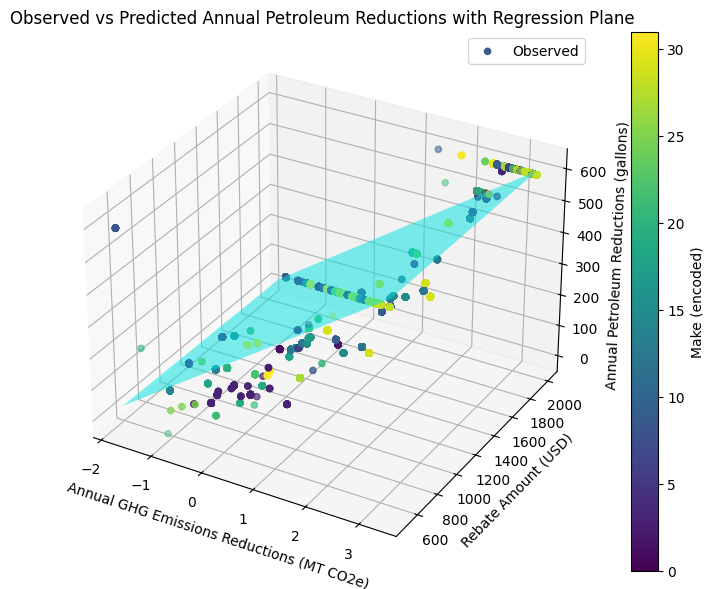

In [52]:
# Plot observed vs predicted values with the regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors representing 'Make'
sc = ax.scatter(X_test['Annual GHG Emissions Reductions (MT CO2e)'], X_test['Rebate Amount (USD)'], y_test,
                c=eCar2.loc[X_test.index, 'Make_encoded'], cmap='viridis', label="Observed")

# Add a color bar to represent the 'Make' categories
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Make (encoded)')

# Create a mesh grid for the regression plane
x_ghg, x_rebate = np.meshgrid(
    np.linspace(X_test['Annual GHG Emissions Reductions (MT CO2e)'].min(), X_test['Annual GHG Emissions Reductions (MT CO2e)'].max(), 10),
    np.linspace(X_test['Rebate Amount (USD)'].min(), X_test['Rebate Amount (USD)'].max(), 10)
)

# Calculate predicted values for the regression plane
y_pred_plane = model.intercept_ + model.coef_[0] * x_ghg + model.coef_[1] * x_rebate

# Plot the regression plane
ax.plot_surface(x_ghg, x_rebate, y_pred_plane, color="cyan", alpha=0.5, rstride=100, cstride=100)

# Set axis labels and title
ax.set_xlabel('Annual GHG Emissions Reductions (MT CO2e)')
ax.set_ylabel('Rebate Amount (USD)')
ax.set_zlabel('Annual Petroleum Reductions (gallons)')
ax.set_title('Observed vs Predicted Annual Petroleum Reductions with Regression Plane')

# Show plot and legend
plt.legend()
plt.show()


**Interpretation**



*   The 3D plot illustrates the relationship between observed annual petroleum reductions and the model’s regression plane, using annual GHG emissions reductions and rebate amount as input features. Data points are color-coded by vehicle make, as shown on the color bar, revealing the diversity of makes in the dataset. The alignment of points with the cyan regression plane suggests that the model is reasonably accurate in capturing the trend that higher rebate amounts and greater GHG emissions reductions are associated with higher petroleum reductions. Points that closely align with the regression plane indicate accurate predictions, while those further away highlight discrepancies, suggesting areas where the model’s predictions may be less precise. This visualization provides insight into the model's performance and areas for potential improvement, as well as highlighting the positive correlation between the input features and petroleum reductions.


# **Logistic Regression**

This section creates a logistic regression model using selected attributes from the eCar dataset, then plots the observed values against the predicted values. It also evaluates the model's performance by providing both absolute loss and log loss.

1. The code cleans the eCar dataframe to focus on more practical electric vehicles that are likely to be more relevant to most users by removing rows with missing values and filtering out BEVs with low electric ranges. It then converts the Electric Vehicle Type to numerical values. The data is then split into training and testing sets, and a logistic regression model is trained to predict whether a vehicle is a BEV or a PHEV based on its electric range. Finally, the model's predictions are displayed in a plot, with blue points representing the test data and a red curve showing the probability of a vehicle being a BEV across the range of electric distances.

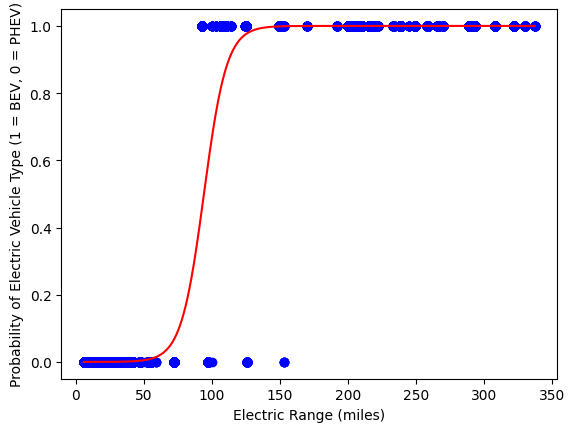

In [53]:
eCar_logistic = eCar.dropna(subset=['Electric Vehicle Type', 'Electric Range'])
eCar_logistic = eCar_logistic[~((eCar_logistic['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (eCar_logistic['Electric Range'] < 90))]

eCar_logistic.loc[eCar_logistic['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)', 'Electric Vehicle Type'] = 1
eCar_logistic.loc[eCar_logistic['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Electric Vehicle Type'] = 0

X = eCar_logistic[['Electric Range']].values.reshape(-1, 1)
y = eCar_logistic[['Electric Vehicle Type']].values.reshape(-1, 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

logisticModel = LogisticRegression()
logisticModel.fit(X_train, np.ravel(y_train.astype(int)))

plt.scatter(X_test, y_test, color = 'blue')
x_prob = np.linspace(X_test.min(), X_test.max(), 1000)
y_prob = logisticModel.predict_proba(x_prob.reshape(-1, 1))[:, 1]
plt.plot(x_prob, y_prob, color='red')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Probability of Electric Vehicle Type (1 = BEV, 0 = PHEV)')
plt.show()

**Interpretation**
* It effectively shows that vehicles with longer electric ranges are more likely to be BEVs, whereas shorter-range vehicles are more likely to be PHEVs. This indicates that the logistic model is ready to test absolute loss and log loss.

2. This code calculates the absolute value of the difference between the observed class and the predicted probability. It then computes the overall absolute loss for this logistic model by averaging the absolute loss values across all instances.

In [54]:
y_pred_proba = logisticModel.predict_proba(X_test)[:, 1]
absolute_loss = mean_absolute_error(y_test, y_pred_proba)
print(f"Overall Absolute Loss for the Logistic Model: {absolute_loss:.2f}")

Overall Absolute Loss for the Logistic Model: 0.01


**Interpretation**
- This low absolute loss suggests that the model is highly accurate, with minimal error in its probability predictions for each instance in the test set.

3. This code calculates the log loss for a logistic model by first predicting the probabilities of each class for instances in the test set (X_test). It then computes the log loss by comparing these predicted probabilities (p_hat) to the observed class (y_test) using the metrics.log_loss function, which quantifies the model's prediction error. Finally, the log loss is printed, giving a quick summary of the model's overall prediction accuracy.

In [55]:
p_hat = logisticModel.predict_proba(X_test)
log_loss = metrics.log_loss(y_test, p_hat)
print(f"Log Loss for the Logistic Model: {log_loss:.2f}")

Log Loss for the Logistic Model: 0.02


**Interpretation**
- This low log loss suggests that logistic model’s predictions are highly accurate, as this indicates minimal deviation between the predicted probabilities and the observed class.

4. This code performs cross-validation on a logistic model using 10, 100, and 200 folds to calculate the mean squared error for each method. It then plots these errors to compare how prediction accuracy varies with the number of folds, helping to visually assess model performance across different cross-validation strategies.

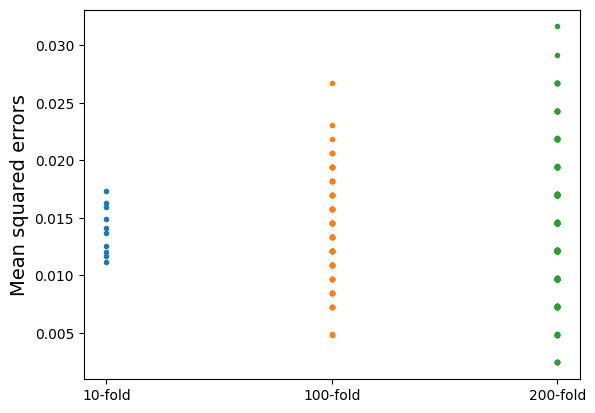

In [56]:
y = y.ravel()

ten_fold_scores = -cross_val_score(
    logisticModel, X, y, scoring='neg_mean_squared_error', cv=10
)
hundred_fold_scores = -cross_val_score(
    logisticModel, X, y, scoring='neg_mean_squared_error', cv=100
)
two_hundred_fold_scores = -cross_val_score(
    logisticModel, X, y, scoring='neg_mean_squared_error', cv=200
)

plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(hundred_fold_scores) + 1, hundred_fold_scores, '.')
plt.plot(np.zeros_like(two_hundred_fold_scores) + 2, two_hundred_fold_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14);
plt.xticks([0, 1, 2], ['10-fold', '100-fold', '200-fold']);

**Interpretation**
- In this plot, we can see that when we use more folds (like 100 or 200), the errors are usually smaller (closer to 0), which means the model is making fewer mistakes on average. However, the errors are also more spread out, which means there is more variation in how well the model performs. This happens because, with more folds, each part of the data used for training is smaller, making the results less stable.
On the other hand, when we use fewer folds (like 10), the errors are more consistent and less spread out, which means there is less variation. But the average size of the errors is a bit bigger, which means the model has more bias and makes similar kinds of mistakes more often. This happens because each part of the data used for training is larger, making the model more stable but slightly less flexible.

# **Bootstrap Method**

This section uses the bootstrap method to evaluate the performance of our linear regression model, which uses one feature (Model Year) to predict one target (Electric Range), and calculates the mean and standard deviation of the errors to assess the model's consistency and accuracy.

1. This code is performing a process called bootstrapping to evaluate the performance of a linear regression model. It first removes rows from eCar where 'Electric Range' or 'Model Year' is missing. Then, it repeats the following process 30 times: it creates a new dataset (boot) by randomly selecting 80% of the data from eCar_sample, allowing for duplicates (sampling with replacement). The remaining data that was not selected (oob, called "out-of-bag") is used for testing. A linear regression model is trained on the boot dataset, with 'Model Year' as the input and 'Electric Range' as the output. Then, the model is tested on the oob data to predict 'Electric Range' using 'Model Year'. The mean squared error (a measure of how well the model performs) is calculated between the actual and predicted values, and this error is stored in bootstrapErrors. This entire process is repeated 30 times to see how much the model's error varies across different samples.

In [57]:
eCar_sample = eCar.dropna(subset=['Model Year', 'Electric Range'])

bootstrapErrors = []
for i in range(0, 30):
    boot = resample(eCar_sample, replace=True, n_samples=int(len(eCar_sample)*0.8))
    oob = eCar_sample[~eCar_sample.index.isin(boot.index)]

    XBoot = boot[['Model Year']].values.reshape(-1, 1)
    yBoot = boot[['Electric Range']].values.reshape(-1, 1)

    model.fit(XBoot, np.ravel(yBoot))

    XOob = oob[['Model Year']].values.reshape(-1, 1)
    YOob = oob[['Electric Range']].values.reshape(-1, 1)
    YOobPredicted = model.predict(XOob)

    bootError = mean_squared_error(YOob, YOobPredicted)
    bootstrapErrors.append(bootError)

2. This code calculates and prints the average error (Error mean) and the standard deviation (std) of the errors from the model. The average error shows how much the model's predictions are off, while the standard deviation indicates how consistent the errors are.

In [58]:
print(f"Error mean: {np.mean(bootstrapErrors)}")
print(f"       std: {np.std(bootstrapErrors)}")

Error mean: 5749.410887324936
       std: 24.537146049064983


3. This code creates a scatter plot of the bootstrap errors along the x-axis, with all points positioned at y=0. The x-axis is labeled "Bootstrap errors (MSE)" to represent the mean squared error values, and the y-axis ticks are removed since they are unnecessary. This plot helps visualize how the errors are distributed.

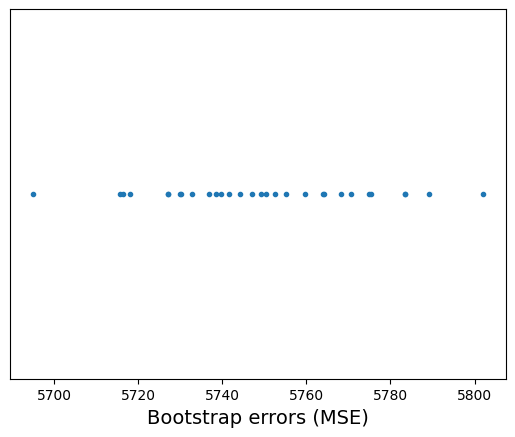

In [59]:
plt.plot(bootstrapErrors, np.zeros_like(bootstrapErrors), '.')
plt.xlabel('Bootstrap errors (MSE)', fontsize=14)
plt.gca().axes.yaxis.set_ticks([]);

**Interpretation**
* From the result of this code, we can interpret that the average error (mean squared error, or MSE) of the predictions from the bootstrapped models is 5760.74. This means, on average, the model’s predicted electric range differs from the actual value by around 5760 squared units. The standard deviation of the errors is 26.58, indicating that the errors are relatively consistent across the 30 bootstrapped samples, as there isn’t much variation. The scatter plot of the errors shows how closely the different bootstrap errors cluster, suggesting the model’s performance is fairly stable.

# **One-Standard-Error**

This section compares models using the one-standard-error, which identifies the model with the minimum mean score and then selects the simplest model whose mean score falls within one standard deviation of the minimum.

1. This code applies polynomial regression to explore the relationship between an electric vehicle's annual petroleum reductions (gallons) and GHG emissions reductions (MT CO2e). The dataset eCar2 is filtered to remove petroleum reductions over 550 gallons to avoid outliers, then split into training and test sets (80/20). Polynomial features of degree 3 are created from the training data, and a linear regression model is trained. The results are visualized with a scatter plot of actual data (black) and the fitted curve (blue).

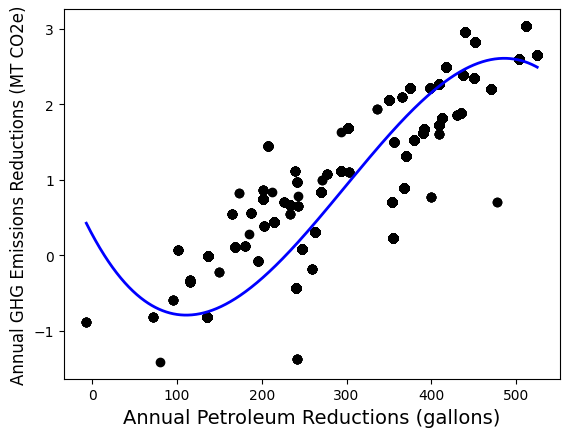

In [60]:
eCar_error = eCar2[~(eCar2['Annual Petroleum Reductions (gallons)'] > 550)]
eCarTrainingData, test_data = train_test_split(eCar_error, test_size=0.20)

X = eCarTrainingData[['Annual Petroleum Reductions (gallons)']].values.reshape(-1, 1)
y = eCarTrainingData[['Annual GHG Emissions Reductions (MT CO2e)']].values.reshape(-1, 1)

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
XPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(XPoly, y)

plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Annual Petroleum Reductions (gallons)', fontsize=14);
plt.ylabel('Annual GHG Emissions Reductions (MT CO2e)', fontsize=12);

**Interpretation**

* We can notice that there is a clear, non-linear relationship between annual petroleum reductions and GHG emissions reductions of electric vehicles. This relationship is effectively captured by the polynomial regression model, as shown by the blue curve fitting the data points.

2. The code below evaluates how well polynomial regression models with degrees ranging from 1 to 6 perform by using a technique called 10-fold cross-validation. For each polynomial degree, it first transforms the input data (X) to include polynomial terms of that degree using PolynomialFeatures. Then, it trains a linear regression model (polyModel) using this transformed data and the target variable (y). The code uses cross-validation to split the data into 10 parts, trains the model on 9 parts, and tests it on the remaining part, repeating this process 10 times. It calculates the mean and standard deviation of the prediction errors (mean squared error) for each degree. The results are stored in two lists - cvMeans for the average errors and cvStdDev for the variability of the errors.

In [61]:
cvMeans = []
cvStdDev = []

for i in range(1, 7):
    polyFeatures = PolynomialFeatures(degree=i, include_bias=False)
    XPoly = polyFeatures.fit_transform(X)
    polyModel = LinearRegression()
    polyModel.fit(XPoly, y)

    polyscore = -cross_val_score(
        polyModel, XPoly, y, scoring='neg_mean_squared_error', cv=10
    )

    cvMeans.append(np.mean(polyscore))
    cvStdDev.append(np.std(polyscore))

3. This code creates a plot to visualize the mean squared error (MSE) of polynomial regression models with degrees ranging from 1 to 6, along with error bars representing variability.

Text(0, 0.5, 'Mean squared error')

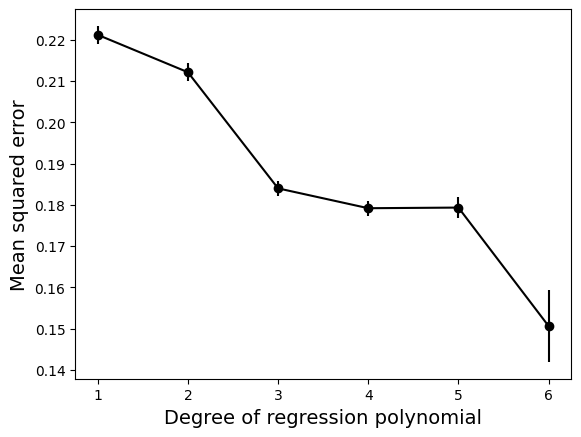

In [62]:
plt.errorbar(x=range(1, 7), y=cvMeans, yerr=cvStdDev, marker='o', color='black')
plt.xlabel('Degree of regression polynomial', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)

**Interpretation**
* From this result, we can interpret that as the degree of the regression polynomial increases, the mean squared error (MSE) decreases, indicating that higher-degree polynomial models fit the data better. The error bars, which represent the standard deviation of the MSE, remain relatively small for degrees 1 to 5, showing consistent performance across cross-validation folds. However, at degree 6, while the MSE is the lowest, the larger error bar suggests higher variability, which could indicate overfitting. This implies that while increasing the polynomial degree improves the model's accuracy, it may also lead to less generalizable models at higher degrees. Selecting the appropriate degree (such as 3 or 4) balances accuracy and consistency without overfitting.

# **Conclusion**

Through the process of evaluating various regression models, we learned how different approaches offer unique insights and challenges. Starting with the linear regression model using two features, we observed that the predictions had an average error of 20–25 units, and a higher RMSE compared to MAE revealed larger individual errors in some cases. We also found that consistent cross-validation metrics indicate stability in the data. Moving to the multiple regression model, we saw improved reliability, with MSE, RMSE, and MAE values showing that the model performed well overall. The 3D plot helped us understand how rebate amounts and GHG emissions reductions positively influence petroleum reductions, although discrepancies highlighted areas where the model could be improved.

When exploring the logistic regression model, we learned how it effectively classifies vehicles based on electric range, with longer ranges linked to BEVs and shorter ranges to PHEVs. Low absolute loss and log loss demonstrated the model's accuracy, and we discovered that increasing the number of folds in cross-validation reduces errors but introduces more variability. Through the bootstrap method, we understood how sampling helps evaluate model stability, with the results showing consistent performance and relatively low error variation. Finally, using the polynomial regression model, we learned how increasing the degree reduces MSE and improves accuracy, but we also saw how higher degrees could lead to overfitting, as indicated by larger error variability. This showed us the importance of balancing accuracy and consistency, with degrees like 3 or 4 offering the best trade-off.

Overall, this progression taught us how to apply and evaluate different models, interpret their metrics, and identify areas for improvement, which is essential for building robust and reliable predictive models.